In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tushare as ts
import pulp


In [16]:
pro=ts.pro_api('9526a2198c86fb0a72fa552f74ba1140033871f755dcd769e3134b7b')

In [17]:
df_PA=pro.daily(ts_code='601318.SH',start_date='20180101',end_date='20190716')
df_ZX=pro.daily(ts_code='600030.SH',start_date='20180101',end_date='20190716')
df_TX=pro.daily(ts_code='600776.SH',start_date='20180101',end_date='20190716')
df_MT=pro.daily(ts_code='600519.SH',start_date='20180101',end_date='20190716')

In [18]:
def set_date(x):
    x['trade_date']=pd.to_datetime(x['trade_date'])
    x.set_index('trade_date',inplace=True)
    return x['close']


In [19]:
df=pd.concat([set_date(df_PA),set_date(df_ZX),set_date(df_TX),set_date(df_MT)],keys=['df_PA','df_ZX','df_TX','df_MT'],axis=1)

In [20]:
df.head()

,df_PA,df_ZX,df_TX,df_MT
trade_date,,,,
2018-01-02,72.59,18.44,7.29,703.85
2018-01-03,70.97,18.61,7.45,715.86
2018-01-04,71.18,18.67,7.40,737.07
2018-01-05,70.89,18.88,7.42,738.36
2018-01-08,70.01,19.54,7.35,752.13


In [21]:
df_PA.sort_index(ascending=True,inplace=True)

In [22]:
def sort_date(x):
    for i in x:
        i.sort_index(ascending=True,inplace=True)

In [23]:
sort_date([df_MT,df_TX,df_ZX])

In [24]:
df_MT

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2018-01-02,600519.SH,700.00,710.16,689.89,703.85,697.49,6.36,0.9100,49612.48,3482407.646
2018-01-03,600519.SH,701.50,721.40,699.74,715.86,703.85,12.01,1.7100,52019.41,3713523.701
2018-01-04,600519.SH,721.40,743.50,719.33,737.07,715.86,21.21,2.9600,72205.08,5309890.210
2018-01-05,600519.SH,741.00,746.03,728.22,738.36,737.07,1.29,0.1800,39989.07,2946493.013
2018-01-08,600519.SH,735.02,756.50,735.02,752.13,738.36,13.77,1.8600,52204.56,3899951.720
2018-01-09,600519.SH,752.21,783.00,752.21,782.52,752.13,30.39,4.0400,64591.95,5001164.506
2018-01-10,600519.SH,785.00,788.88,773.48,785.71,782.52,3.19,0.4100,47714.24,3731993.154
2018-01-11,600519.SH,787.00,788.00,772.00,774.81,785.71,-10.90,-1.3900,50656.07,3942075.854
2018-01-12,600519.SH,773.77,788.80,767.02,788.42,774.81,13.61,1.7600,45988.24,3577281.776


In [25]:
def rate(x):
    for i in x:
        df[i+'_RATE']=df[i]/df[i].shift(1)-1

In [26]:
rate(['df_PA','df_TX','df_ZX','df_MT'])


In [27]:
df.head()

,df_PA,df_ZX,df_TX,df_MT,df_PA_RATE,df_TX_RATE,df_ZX_RATE,df_MT_RATE
trade_date,,,,,,,,
2018-01-02,72.59,18.44,7.29,703.85,NaN,NaN,NaN,NaN
2018-01-03,70.97,18.61,7.45,715.86,-0.022317,0.021948,0.009219,0.017063
2018-01-04,71.18,18.67,7.40,737.07,0.002959,-0.006711,0.003224,0.029629
2018-01-05,70.89,18.88,7.42,738.36,-0.004074,0.002703,0.011248,0.001750
2018-01-08,70.01,19.54,7.35,752.13,-0.012414,-0.009434,0.034958,0.018649


In [28]:
df=df['2018-01-03':]

In [29]:
df.head()

,df_PA,df_ZX,df_TX,df_MT,df_PA_RATE,df_TX_RATE,df_ZX_RATE,df_MT_RATE
trade_date,,,,,,,,
2018-01-03,70.97,18.61,7.45,715.86,-0.022317,0.021948,0.009219,0.017063
2018-01-04,71.18,18.67,7.40,737.07,0.002959,-0.006711,0.003224,0.029629
2018-01-05,70.89,18.88,7.42,738.36,-0.004074,0.002703,0.011248,0.001750
2018-01-08,70.01,19.54,7.35,752.13,-0.012414,-0.009434,0.034958,0.018649
2018-01-09,71.87,19.44,7.45,782.52,0.026568,0.013605,-0.005118,0.040405


In [30]:
df_RATE=df[['df_PA_RATE','df_TX_RATE','df_ZX_RATE','df_MT_RATE']]

In [31]:
df_RATE

,df_PA_RATE,df_TX_RATE,df_ZX_RATE,df_MT_RATE
trade_date,,,,
2018-01-03,-0.022317,0.021948,0.009219,0.017063
2018-01-04,0.002959,-0.006711,0.003224,0.029629
2018-01-05,-0.004074,0.002703,0.011248,0.001750
2018-01-08,-0.012414,-0.009434,0.034958,0.018649
2018-01-09,0.026568,0.013605,-0.005118,0.040405
2018-01-10,-0.002087,-0.020134,0.008745,0.004077
2018-01-11,0.012967,0.060274,-0.016828,-0.013873
2018-01-12,0.024226,-0.012920,0.002593,0.017566
2018-01-15,0.043543,-0.053665,0.006208,-0.003868


In [32]:
df_RATE.cov()

,df_PA_RATE,df_TX_RATE,df_ZX_RATE,df_MT_RATE
df_PA_RATE,0.000410,0.000208,0.000318,0.000313
df_TX_RATE,0.000208,0.001921,0.000488,0.000192
df_ZX_RATE,0.000318,0.000488,0.000588,0.000246
df_MT_RATE,0.000313,0.000192,0.000246,0.000495


In [33]:
delta=df.index.max()-df.index.min()

In [34]:
delta

Timedelta('559 days 00:00:00')

In [35]:
df_RATE.mean()*559

df_PA_RATE    0.385369
df_TX_RATE    2.139474
df_ZX_RATE    0.459853
df_MT_RATE    0.616978
dtype: float64

In [36]:
weights=np.random.random(4)
weights/=np.sum(weights)

In [37]:
weights

array([0.36689983, 0.31885849, 0.00360579, 0.31063589])

In [38]:
weights.sum()

1.0

In [39]:
(np.sum(df_RATE.mean()*weights)*559)

1.0168947668157986

In [59]:
np.dot(np.dot(df_RATE.cov()*559,weights),weights.T)

0.29385502887676773

In [60]:
np.sqrt(np.dot(weights.T,np.dot(df_RATE.cov()*559,weights)))

0.5420839684742279

In [61]:
prets=[]
pvols=[]
for i in range(2500):
    weights=np.random.random(4)
    weights/=np.sum(weights)
    prets.append(np.sum(df_RATE.mean()*weights)*559)
    pvols.append(np.sqrt(np.dot(weights.T,np.dot(df_RATE.cov()*559,weights))))

prets=np.array(prets)
pvols=np.array(pvols)

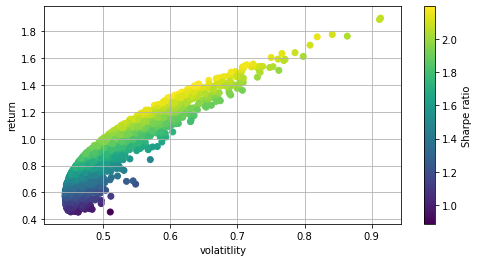

In [62]:
plt.figure(figsize=(8,4))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.grid(True)
plt.xlabel('volatitlity')
plt.ylabel('return')
plt.colorbar(label='Sharpe ratio')

In [63]:
def statistics(weights,time,df):
    '''
    Use params to calculate the best weights
    :param weights: weights for every assets
    :param time: 
    :param df: return rate
    :return: rate
    '''
    weights=np.array(weights)
    pret=np.sum(df.mean()*weights)*time
    pvol=np.sqrt(np.dot(weights.T,np.dot(df.cov()*time,weights)))
    return np.array([pret,pvol,pret/pvol])

In [64]:
import scipy.optimize as sco


In [65]:
def min_func_sharpe(weights,time,df):
    return -statistics(weights,time,df)[2]

In [66]:
bnds=tuple((0,1) for x in range(4))
cons=({'type':'eq','fun':lambda x:np.sum(x)-1})

In [67]:
opts=sco.minimize(fun=min_func_sharpe,x0=[0.25,0.25,0.25,0.25],method='SLSQP',args=(559,df_RATE),bounds=bnds,constraints=cons)

In [68]:
opts


     fun: -2.2074783640571027
     jac: array([ 1.42197788e-01,  1.33067369e-04,  3.79905999e-01, -1.61528587e-04])
 message: 'Optimization terminated successfully.'
    nfev: 51
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.00000000e+00, 5.48449267e-01, 8.18025922e-17, 4.51550733e-01])

In [69]:

opts['x'].round(4)

array([0.    , 0.5484, 0.    , 0.4516])

In [70]:
statistics(opts['x'],559,df_RATE)

array([1.4519898 , 0.65775947, 2.20747836])

In [71]:
def min_func_port(weights,time,df):
    return statistics(weights,time,df)[1]

In [72]:
trets=np.linspace(0,0.25)
tvols=[]
for tret in trets:
    cons=[{'type':'eq','fun':lambda x:statistics(x,559,df_RATE)-tret},
          {'type':'eq','fun':lambda x:np.sum(x)-1}]
    res=sco.minimize(fun=min_func_port,x0=[0.25,0.25,0.25,0.25],args=(559,df_RATE),method='SLSQP',bounds=bnds,constraints=cons)
    tvols.append(res['fun'])
tvols=np.array(tvols)

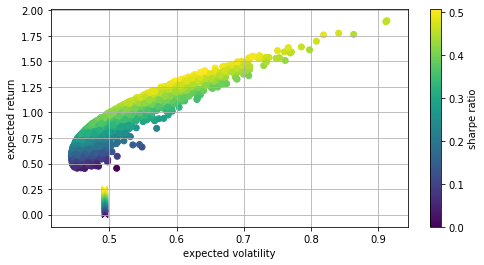

In [75]:
plt.figure(figsize=(8,4))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.scatter(tvols,trets,c=trets/tvols,marker='x')   #use 'x' as mark to describe efficient frontier
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='sharpe ratio')

In [6]:
#用pulp进行约束求解
'''
A simple linear optimization problem with 2 variables
'''
x=pulp.LpVariable('x',lowBound=0,upBound=40)
y=pulp.LpVariable('y',lowBound=0)
problem=pulp.LpProblem(name='A simple model with 2 variables',sense=pulp.LpMaximize)
problem+=3*x+2*y,'The objective function'
problem+=x+y<=80,'1st constraint'
problem+=2*x+y<=100
stats=problem.solve()

In [14]:
pulp.value(x)
pulp.value(y)

60.0